In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import os
import fpfs
import galsim
import numpy as np
import matplotlib.pylab as plt
from fpfs.simutil import LensTransform

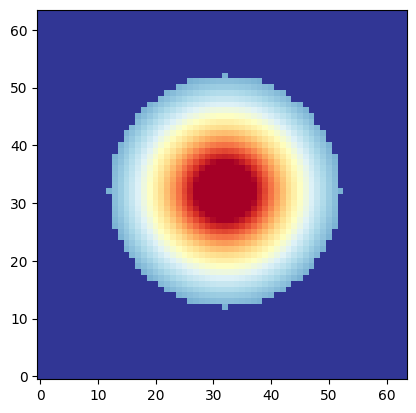

In [3]:
"""Original galaxy"""
flux = 40
scale = 0.2
nn = 64
sersic_gal = galsim.Sersic(n=1.5, half_light_radius=1.5, flux=flux, trunc=4)
stamp = fpfs.simutil.Stamp(nn=nn, scale=scale)
gal_array = stamp.sample_galaxy(sersic_gal)
plt.close()
fpfs.pltutil.make_plot_image(gal_array)

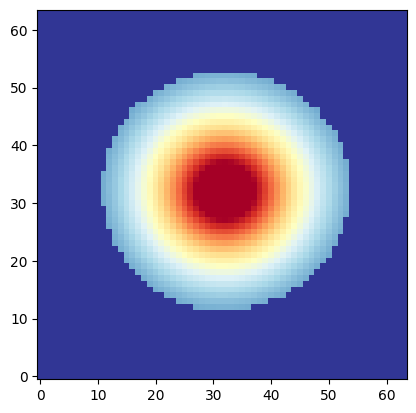

In [5]:
"""Transform then produce image"""
kappa = 0.05
gamma1 = 0.02
gamma2 = 0.0
G1 = 0.003
G2 = 0.0025
F1 = 0.0007
F2 = 0.001
lens = LensTransform(gamma1=gamma1, gamma2=gamma2, kappa=kappa,F1=F1,F2=F2,G1=G1,G2=G2)

stamp = fpfs.simutil.Stamp(nn=nn, scale=scale)
stamp.transform_grids(lens)
gal_array2 = stamp.sample_galaxy(sersic_gal)
plt.close()
fpfs.pltutil.make_plot_image(gal_array2)

In [48]:
kappa = 0.00
gamma1 = 0.2
gamma2 = 0.3
G1 = 0.003 * 1
G2 = 0.0025 *1
F1 = 0.0007 * 1
F2 = 0.001 * 1
lens = LensTransform(gamma1=gamma1, gamma2=gamma2, kappa=kappa,F1=F1,F2=F2,G1=G1,G2=G2)
stamp = fpfs.simutil.Stamp(nn=64, scale=scale)
stamp.transform_grids(lens)
gal_array3 = stamp.sample_galaxy(sersic_gal)
psf_array = np.zeros(stamp.shape)
psf_array[nn // 2, nn // 2] = 1

coords = np.array([nn//2, nn//2])
fpTask  =   fpfs.image.measure_source(psf_array, pix_scale = scale, sigma_arcsec=0.52)
mms =  fpTask.measure(gal_array3, coords)
mms = fpTask.get_results(mms)
ells=   fpfs.catalog.fpfs_m2e(mms,const=20)
resp1=np.average(ells['fpfs_R1E'])
shear1=np.average(ells['fpfs_e1'])/resp1
resp2=np.average(ells['fpfs_R2E'])
shear2=np.average(ells['fpfs_e2'])/resp2
print(shear1)
print(shear2)
# print("input shear: %.5f" % gamma1)
# print("measured shear: %.5f" % shear)
"""With gamma =0.2,0.3, the estimation was around 0.20013218952982748 and 0.2919009958423755"""
"""...0.02, 0.03, ...0.02003064723646912 and 0.02998245742260666"""
"""Now adding Flexion with order of magnitude around 0.001, for 0.02, 0.03, we get 0.020032481694420345 and 0.029983423954798905"""
"""Now adding flexion with order of magnitude around 0.01, we get 0.020214244225607216 and 0.030079188989101006"""


"""With gamma =0.2,0.3, and flexion with order around 0.001, the estimation was around 0.20013569976121798 and 0.29190411649459763"""
"""With gamma = 0.2, 0.3 and flexino with order around 0.01, the estimation was around 0.20048144975333682 and 0.29221031487931887"""

2023/09/18 01:09:15 ---  Order of the shear estimator: nnord=4
2023/09/18 01:09:15 ---  Shapelet kernel in configuration space: sigma= 0.5200 arcsec
2023/09/18 01:09:15 ---  Detection kernel in configuration space: sigma= 0.5200 arcsec


0.20013569976121798
0.29190411649459763


'With gamma = 0.2, 0.3 and flexino with order around 0.01, the estimation was around 0.20048144975333682 and 0.29221031487931887'